# Machine Learning Lab 2

## Importing libraries for entire exercise

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups
%matplotlib inline


# Naive Bayes Classification on numeric data 

## Loading data

In [3]:
data = pd.read_csv('data.csv')
data_sec = pd.read_csv('data.csv')

## Defining function to convert classes to numeric

In [4]:
def diagnum(x):
    if x == 'M' or x == 1:
        return 1
    else:
        return 0

## Applying conversion to entire dataframe and also preparing output vector

In [5]:
data_sec_y = data_sec['diagnosis'].apply(diagnum)
data_sec = data_sec.drop(['diagnosis'],axis = 1)

## Splitting data and test and train sets (75-train and 25 test)

In [6]:
train_x,test_x,train_y,test_y = train_test_split(data_sec,data_sec_y,test_size = 0.2,random_state = 0)

## Setting up Naive Bayes classifier to classify whether tumor is benign or malignant

###  We have to assume that the distribution of the data is Gaussian for the classifier to work (Hence the 'Naive')
### To this end we have used GuassianNB( ) function

In [7]:
headings = data_sec.columns.tolist()
model = GaussianNB()
model.fit(train_x[headings[1:3]],train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

## Error Metric 1: Accuracy

In [8]:
print("The accuracy of the model on test data is found to be :",model.score(test_x[headings[1:3]],test_y))
print("The accuracy of the model on train data is found to be :",model.score(train_x[headings[1:3]],train_y))

The accuracy of the model on test data is found to be : 0.9035087719298246
The accuracy of the model on train data is found to be : 0.8857142857142857


## Error Metric 2: Precision

### Introduced the confusion matrix that is essential to calculate the necessary metrics

In [9]:
conf_mat = metrics.confusion_matrix(test_y,model.predict(test_x[headings[1:3]]))
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
print("The precision of the model is found to be:",precision)

The precision of the model is found to be: 0.9402985074626866


## Error Metric 3: Recall

In [10]:
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print("The recall of the model is found to be:",recall)

The recall of the model is found to be: 0.9


## Error Metric 4: F1 score (The most accurate metric to decide on how well the model is doing

In [11]:
f1_score = 2*((precision*recall)/(precision+recall))
print("The F1 score of the model is :",f1_score)

The F1 score of the model is : 0.9197080291970803


# Plotting error metrics

## Plot 1: Precision vs Recall

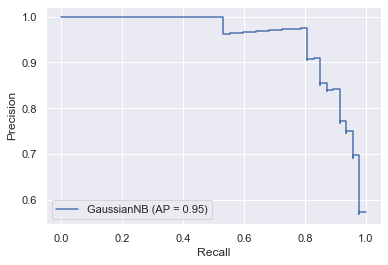

In [12]:
disp = plot_precision_recall_curve(model, test_x[headings[1:3]],test_y)

## Plot 2: The confusion matrix

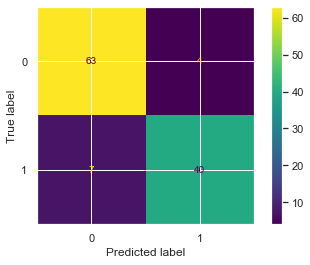

In [13]:
plot_confusion_matrix(model,test_x[headings[1:3]],test_y)

# Naive Bayes classification on Nominal data

## Loading data from sklearn

In [14]:
data = fetch_20newsgroups()

## Selecting specific categories as features and splitting data and test and train sets

In [15]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

## Preview of the data

In [16]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



## Setting up Naive Bayes classification to classify into what category of news it is

### We first vectorize the articles using tf-idf that creates a feature vector oout of the frequency of words in an article

In [17]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## Predicting class labels

In [18]:
label = model.predict(test.data)

## Error metric 1: Accuracy

In [19]:
print("The accuracy of the model on test data is found to be :",model.score(test.data,test.target))
print("The accuracy of the model on train data is found to be :",model.score(train.data,train.target))

The accuracy of the model on test data is found to be : 0.8016759776536313
The accuracy of the model on train data is found to be : 0.8959591267998143


## Error Metric 2: Precision

### Introduced the confusion matrix that is essential to calculate the necessary metrics

In [20]:
conf_mat = metrics.confusion_matrix(test.target,model.predict(test.data))
precision_1 = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][0]+conf_mat[0][1]+conf_mat[0][2])
precision_2 = conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0]+conf_mat[1][2]+conf_mat[1][3])
precision_3 = conf_mat[2][2]/(conf_mat[2][2]+conf_mat[2][0]+conf_mat[2][1]+conf_mat[2][3])
precision_4 = conf_mat[3][3]/(conf_mat[3][3]+conf_mat[3][0]+conf_mat[3][1]+conf_mat[3][2])
print("The precision of the model for class 1 is found to be:",precision_1)
print("The precision of the model for class 2 is found to be:",precision_2)
print("The precision of the model for class 3 is found to be:",precision_3)
print("The precision of the model for class 4 is found to be:",precision_4)

The precision of the model for class 1 is found to be: 0.4693042291950887
The precision of the model for class 2 is found to be: 0.9238578680203046
The precision of the model for class 3 is found to be: 0.9849246231155779
The precision of the model for class 4 is found to be: 0.19123505976095617


## Error Metric 3: Recall

In [21]:
rec_1 = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0]+conf_mat[2][0]+conf_mat[3][0])
rec_2 = conf_mat[1][1]/(conf_mat[1][1]+conf_mat[2][1]+conf_mat[3][1]+conf_mat[0][1])
rec_3 = conf_mat[2][2]/(conf_mat[2][2]+conf_mat[0][2]+conf_mat[1][2]+conf_mat[3][2])
rec_4 = conf_mat[3][3]/(conf_mat[3][3]+conf_mat[0][3]+conf_mat[1][3]+conf_mat[2][3])
print("The recall of the model for class 1 is found to be:",rec_1)
print("The recall of the model for class 2 is found to be:",rec_2)
print("The recall of the model for class 3 is found to be:",rec_3)
print("The recall of the model for class 4 is found to be:",rec_4)

The recall of the model for class 1 is found to be: 0.9690140845070423
The recall of the model for class 2 is found to be: 0.9238578680203046
The recall of the model for class 3 is found to be: 0.6173228346456693
The recall of the model for class 4 is found to be: 1.0


## Error Metric 4: F1 Score

In [22]:
f1_score_1 = 2*((precision_1*rec_1)/(precision_1+rec_1))
f1_score_2 = 2*((precision_2*rec_2)/(precision_2+rec_2))
f1_score_3 = 2*((precision_3*rec_3)/(precision_3+rec_3))
f1_score_4 = 2*((precision_4*rec_4)/(precision_4+rec_4))

print("The F1 score of the model for class 1 is :",f1_score_1)
print("The F1 score of the model for class 2 is :",f1_score_2)
print("The F1 score of the model for class 3 is :",f1_score_3)
print("The F1 score of the model for class 4 is :",f1_score_4)

The F1 score of the model for class 1 is : 0.6323529411764706
The F1 score of the model for class 2 is : 0.9238578680203046
The F1 score of the model for class 3 is : 0.7589545014520812
The F1 score of the model for class 4 is : 0.3210702341137123


# Plotting error metrics

## Plot 1: Confusion matrix

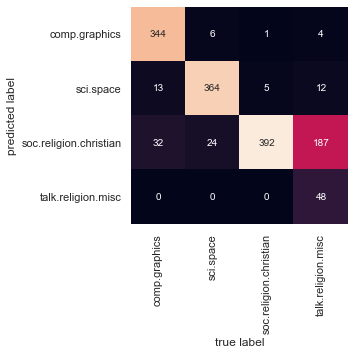

In [24]:
mat = confusion_matrix(test.target, label)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<center> 
    <h1> End of notebook <h2>
</center>